# Exploration of the data

In [1]:
# import libraries
import os

import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.cuda.amp import GradScaler, autocast
from torch.optim.lr_scheduler import ReduceLROnPlateau


import torchvision.transforms as transforms
from torchvision.utils import make_grid
import pandas as pd
import matplotlib.pyplot as plt


import logging
import datetime
import sys
sys.path.append('/home/zerui/SSIRA/code/TAD66K')
from data.dataset import TAD66KDataset
from models.siamese import SiameseNetwork
from data.transforms import get_standard_transforms, get_degradation_transforms
from utils.utils import save_model, load_model, validate_model
import utils.constants as constants

In [2]:
dataset = TAD66KDataset(
    csv_file=constants.PATH_LABEL_MERGE_TAD66K_TRAIN,
    root_dir=constants.PATH_DATASET_TAD66K,
    transform=get_standard_transforms(),
    degradation_transform=get_degradation_transforms(),
)
# Load a batch of data
num_samples_to_display = 10  # Adjust as needed
samples = [dataset[i] for i in range(num_samples_to_display)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


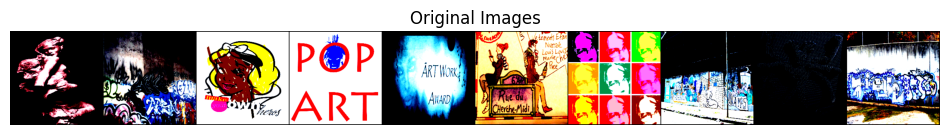

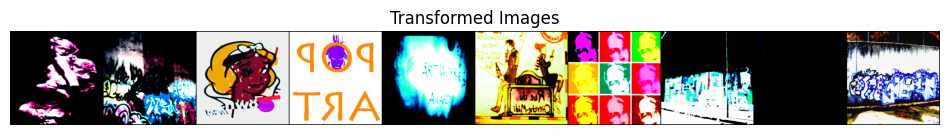

In [3]:
def show_images(images, title):
    grid_img = make_grid(images, nrow=num_samples_to_display)
    plt.figure(figsize=(12, 4))
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display original and transformed images
original_images = [sample[1] for sample in samples]  # Assuming index 1 is original
transformed_images = [sample[0] for sample in samples]  # Assuming index 0 is transformed

show_images(original_images, title="Original Images")
show_images(transformed_images, title="Transformed Images")


Evaluating the performance of your model, especially for a task like contrastive learning in Image Aesthetic Assessment (IAA), involves several steps and considerations. Since your task is not a straightforward classification or regression task, the evaluation metrics and methods can be more nuanced.

1. Review Training and Validation Metrics
First, look at the training and validation metrics you've been logging:

Loss Trends: Observe the trends in training and validation loss over epochs. Ideally, you want to see the training loss decreasing and the validation loss following a similar trend. If the validation loss starts increasing or fluctuating significantly while the training loss continues to decrease, it might indicate overfitting.
Cosine Similarity: Since you're using cosine similarity in validation, higher values (closer to 1) indicate that the model is effectively learning to bring closer the representations of similar (or the same) images and distinguish them from different ones.
2. Visual Inspection and Qualitative Analysis
Feature Space Visualization: If feasible, visualize the feature space using techniques like t-SNE or PCA. This can give you a sense of how well the model is clustering similar images and separating dissimilar ones.
Sample Reconstructions: For a more qualitative analysis, you can view how well the model reconstructs images from their degraded versions (if applicable to your model architecture).
3. Quantitative Evaluation
Aesthetic Quality Assessment: If your model is ultimately intended for IAA, you might want to set up a quantitative evaluation using a separate test set where aesthetic quality is assessed. This could involve measuring correlation with human judgments or other established benchmarks.
Retrieval Tasks: Implement image retrieval tasks where the model retrieves images similar to a given query image based on the learned features. The effectiveness of this can be quantitatively evaluated using metrics like Precision@k, Recall, or Mean Average Precision (MAP).
4. Additional Testing
Robustness and Generalization: Test the model on a diverse set of images, including those not seen during training, to assess its generalization capabilities.
Adversarial Testing: In some cases, you might want to test how the model performs under adversarial conditions or with images that are intentionally challenging.
What to Expect
Learning Curve Insights: The learning curves (loss and cosine similarity trends) will provide the first indication of whether the model is learning effectively.
Feature Space Clustering: Effective learning should result in a feature space where similar images are closer together, which can be observed in visualization plots.
Performance Metrics: In quantitative evaluations, expect to see metrics that align with your goals (e.g., high cosine similarity for similar images, good retrieval performance).
Consistency and Robustness: The model should consistently perform well across different datasets and under various conditions.
Final Thoughts
Iterative Process: Model evaluation is often an iterative process. Based on your findings, you may return to model tuning, adjust your training strategy, or even modify the model architecture.
Domain-Specific Considerations: For IAA, it's crucial to consider domain-specific evaluation methods that align with how aesthetic quality is perceived and assessed in real-world scenarios.
User Studies: In some cases, particularly for subjective tasks like aesthetics, conducting user studies can provide valuable insights into the model's performance from a human perspective.